# EDA

In [1]:
import pandas as pd

data = pd.read_csv('final_survey_fitbit_time_series.csv')

print(data.info())

print(data.describe())

print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Columns: 1648 entries, TotalSteps_0 to Id
dtypes: float64(1618), int64(28), object(2)
memory usage: 1.2+ MB
None
       TotalSteps_0  VeryActiveMinutes_0  FairlyActiveMinutes_0  \
count     95.000000            95.000000              95.000000   
mean    9138.073684            27.684211              23.105263   
std     4997.536406            42.649552              27.973191   
min      394.000000             0.000000               0.000000   
25%     5928.500000             0.000000               3.000000   
50%     8687.000000            15.000000              12.000000   
75%    11116.000000            38.500000              32.000000   
max    27346.000000           257.000000             122.000000   

       LightlyActiveMinutes_0  SedentaryMinutes_0   Calories_0  \
count               95.000000           95.000000    95.000000   
mean               229.105263          798.705263  2460.452632   
std            

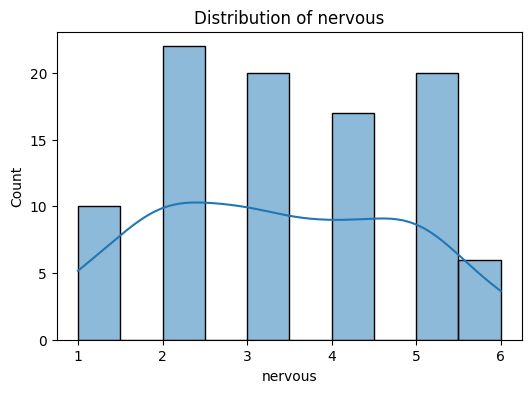

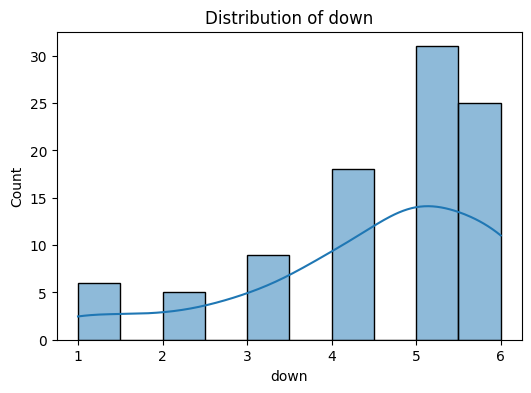

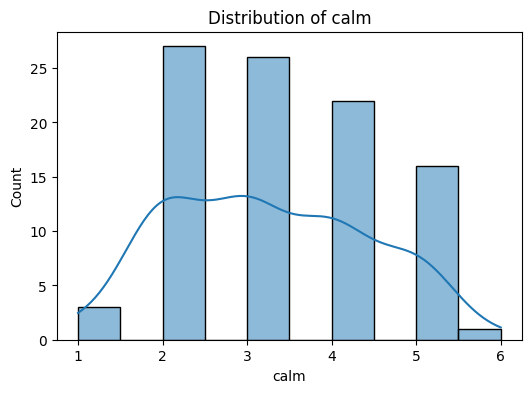

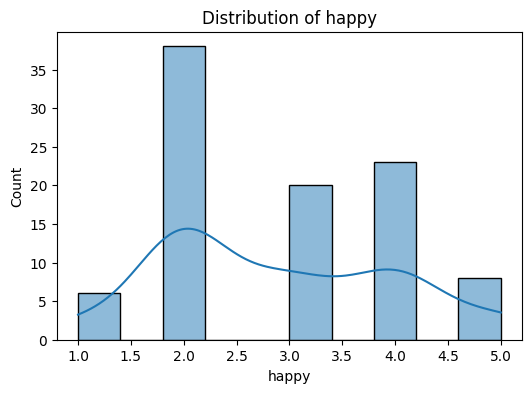

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

target_variables = ['nervous', 'down', 'calm', 'happy']


for target in target_variables:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[target], bins=10, kde=True)
    plt.title(f'Distribution of {target}')
    plt.show()

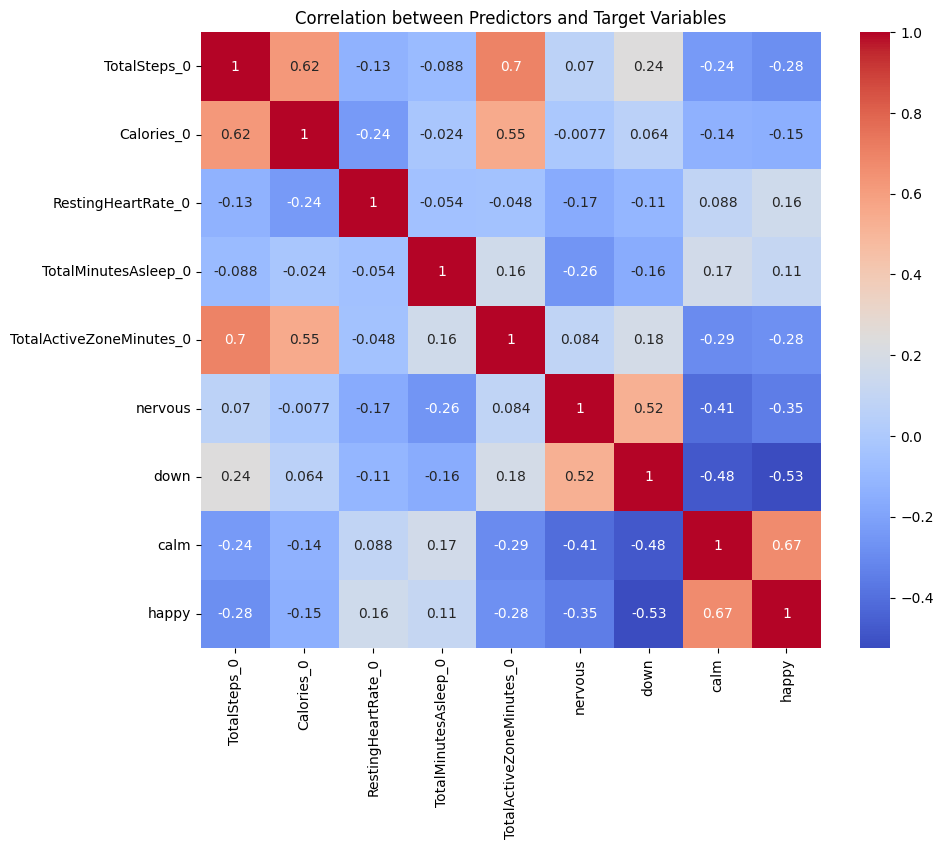

In [4]:
predictor_columns = ['TotalSteps_0', 'Calories_0', 'RestingHeartRate_0', 'TotalMinutesAsleep_0', 'TotalActiveZoneMinutes_0']
target_columns = ['nervous', 'down', 'calm', 'happy']


correlation_matrix = data[predictor_columns + target_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Predictors and Target Variables')
plt.show()

# Feature engineering

1. Load data and process missing values

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

data = pd.read_csv('final_survey_fitbit_time_series.csv')

predictor_columns = ['TotalSteps_0', 'VeryActiveMinutes_0', 'FairlyActiveMinutes_0',
                     'LightlyActiveMinutes_0', 'SedentaryMinutes_0', 'Calories_0',
                     'RestingHeartRate_0', 'TotalActiveZoneMinutes_0', 'FatBurnActiveZoneMinutes_0',
                     'CardioActiveZoneMinutes_0', 'PeakActiveZoneMinutes_0', 'DeepRMSSD_0',
                     'DailyRMSSD_0', 'AvgBreathsPerMinute_0', 'LightSleepAvgBreathsPerMinute_0',
                     'DeepSleepAvgBreathsPerMinute_0', 'REMSleepAvgBreathsPerMinute_0', 
                     'TotalMinutesAsleep_0', 'TotalMinutesinbed_0', 'TotalMinutesAwake_0', 
                     'TotalMinutesLight_0', 'TotalMinutesDeep_0', 'TotalMinutesREM_0', 
                     'skin_temparature_0', 'HR_0']

target_column = 'nervous'

X = data[predictor_columns]
y = data[target_column]

# Use SimpleImputer to fill in the missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

print("Imputed data:")
print(pd.DataFrame(X_imputed, columns=predictor_columns).head())

Imputed data:
   TotalSteps_0  VeryActiveMinutes_0  FairlyActiveMinutes_0  \
0       18236.0                 71.0                   25.0   
1       12671.0                 47.0                   28.0   
2       21238.0                 44.0                   45.0   
3        5926.0                  0.0                    0.0   
4        6680.0                 45.0                   31.0   

   LightlyActiveMinutes_0  SedentaryMinutes_0  Calories_0  RestingHeartRate_0  \
0                   225.0               539.0      2747.0                66.0   
1                   228.0               343.0      2816.0                58.0   
2                   428.0               505.0      3577.0                64.0   
3                   257.0               787.0      2439.0                82.0   
4                   259.0               464.0      3312.0                70.0   

   TotalActiveZoneMinutes_0  FatBurnActiveZoneMinutes_0  \
0                     175.0                       105.0   
1 

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (76, 3)
Test data shape: (19, 3)


# Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

Mean Squared Error (Random Forest): 1.6778684210526316


# Linear Regression

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('final_survey_fitbit_time_series.csv')

# Select predictor variables and target variable
predictor_columns = ['TotalSteps_0', 'Calories_0', 'RestingHeartRate_0']
target_column = 'nervous'

# Extract predictor variables and target variable
X = data[predictor_columns].values
y = data[target_column].values

# Handle missing values
X = np.nan_to_num(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (Linear Regression): {mse}')

Mean Squared Error (Linear Regression): 1.7555093606350454


# CNN

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14.3022
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.7936 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7472 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.8199 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 2.6783
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5407 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9526 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 3.3776
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5747 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3215 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3094 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1138  
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3247 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2339 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2284  
Epoch 16/50
3/3 ━━━━━━━━━━━━━

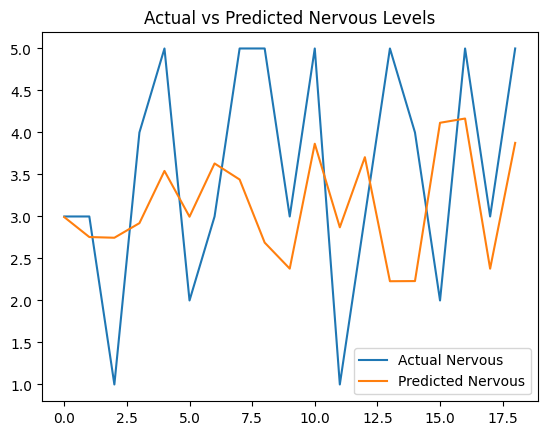

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('final_survey_fitbit_time_series.csv')

# Select predictor variables and target variable
predictor_columns = ['TotalSteps_0', 'VeryActiveMinutes_0', 'FairlyActiveMinutes_0',
                     'LightlyActiveMinutes_0', 'SedentaryMinutes_0', 'Calories_0',
                     'RestingHeartRate_0', 'TotalActiveZoneMinutes_0', 'FatBurnActiveZoneMinutes_0',
                     'CardioActiveZoneMinutes_0', 'PeakActiveZoneMinutes_0', 'DeepRMSSD_0',
                     'DailyRMSSD_0', 'AvgBreathsPerMinute_0', 'LightSleepAvgBreathsPerMinute_0',
                     'DeepSleepAvgBreathsPerMinute_0', 'REMSleepAvgBreathsPerMinute_0', 
                     'TotalMinutesAsleep_0', 'TotalMinutesinbed_0', 'TotalMinutesAwake_0', 
                     'TotalMinutesLight_0', 'TotalMinutesDeep_0', 'TotalMinutesREM_0', 
                     'skin_temparature_0', 'HR_0']
target_column = 'nervous'

# Extract predictor variables and target variable
X = data[predictor_columns].values
y = data[target_column].values

# Handle missing values
X = np.nan_to_num(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Adjust the input data shape to fit CNN input: reshape X to (samples, time steps, features)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)


# Build the CNN model with Input layer
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)  # Output a single prediction
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize actual vs predicted values
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual Nervous')
plt.plot(y_pred, label='Predicted Nervous')
plt.legend()
plt.title('Actual vs Predicted Nervous Levels')
plt.show()


# SVR

In [10]:
from sklearn.svm import SVR

# Train the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'Mean Squared Error (SVR): {mse_svr}')

Mean Squared Error (SVR): 1.6859422654060263


# VAR

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       33.50*      33.59*  3.541e+14*      33.54*
1        33.62       33.98   3.993e+14       33.76
2        33.73       34.36   4.465e+14       33.98
3        33.66       34.56   4.182e+14       34.02
4        33.81       34.97   4.847e+14       34.27
5        33.94       35.37   5.586e+14       34.51
6        34.05       35.75   6.310e+14       34.73
7        34.14       36.10   7.008e+14       34.93
8        34.18       36.41   7.447e+14       35.07
9        34.35       36.85   9.073e+14       35.35
10       34.46       37.23   1.047e+15       35.57
11       34.59       37.62   1.245e+15       35.80
12       34.64       37.95   1.392e+15       35.97
13       34.77       38.34   1.692e+15       36.20
14       34.89       38.73   2.081e+15       36.43
15       34.86       38.97   2.227e+15       36.51
-------------------------------

/var/folders/77/z0v2_lbn04v438615b3l4yq00000gn/T/ipykernel_43428/1606755755.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  multi_var_data.fillna(method='ffill', inplace=True)
/var/folders/77/z0v2_lbn04v438615b3l4yq00000gn/T/ipykernel_43428/1606755755.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_var_data.fillna(method='ffill', inplace=True)


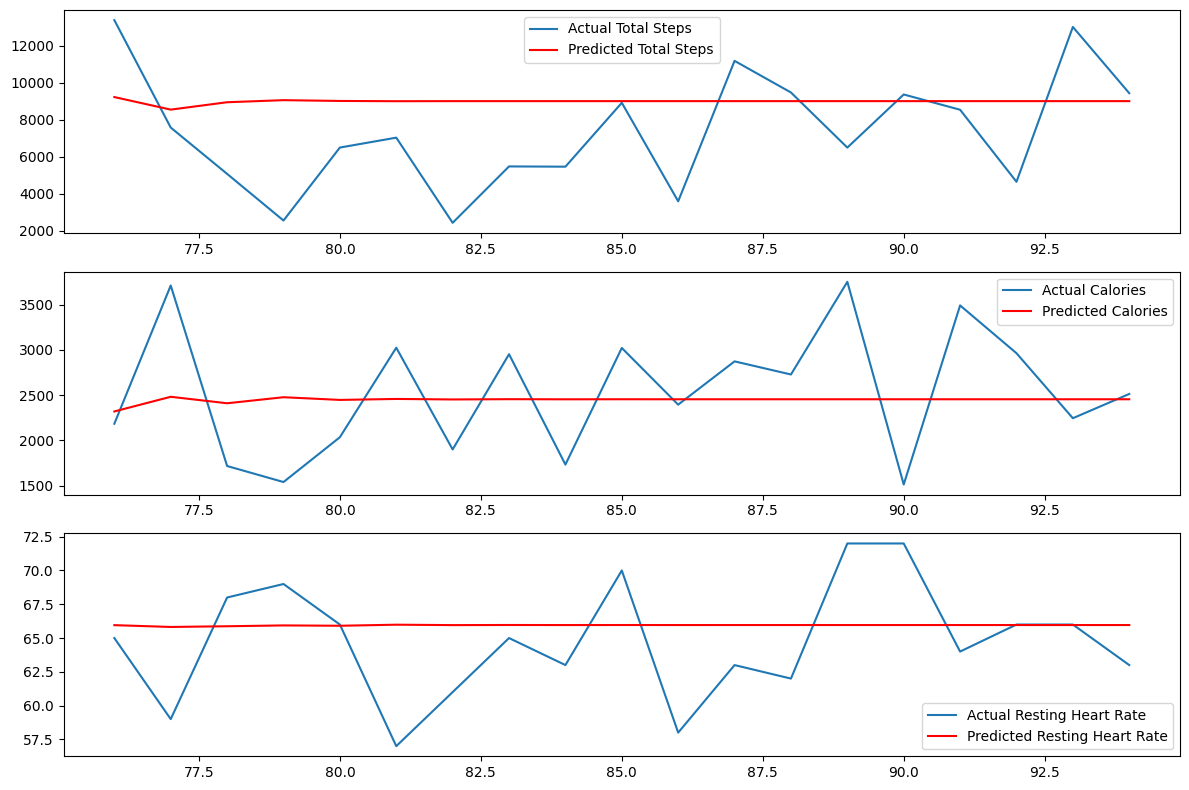

In [9]:
# Convert 'startdate' to datetime format
data['startdate'] = pd.to_datetime(data['startdate'], errors='coerce')

# Select multiple time series variables and drop NaN values
multi_var_data = data[['TotalSteps_0', 'Calories_0', 'RestingHeartRate_0']]

# Use forward fill method to handle missing values
multi_var_data.fillna(method='ffill', inplace=True)

# Fit the VAR model on the selected variables
model = VAR(multi_var_data)

# Divide the data chronologically, with 80% as the training set and 20% as the test set
train_size = int(len(multi_var_data) * 0.8)
train_data, test_data = multi_var_data[:train_size], multi_var_data[train_size:]

# Automatically select the lag order
lag_order = model.select_order(maxlags=15)
print(lag_order.summary()) 

# Manually set a small lag order to test time dependencies
lag_order_value = 2  # Testing with lag 2

# Fit the VAR model
model_fitted = model.fit(lag_order_value)

# Step 4: Make predictions on the test set
# Predict the future points, equal to the length of the test set
predictions = model_fitted.forecast(train_data.values[-lag_order.aic:], steps=len(test_data))

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, index=test_data.index, 
                              columns=['TotalSteps_0_Pred', 'Calories_0_Pred', 'RestingHeartRate_0_Pred'])

# Print the first few rows of the predictions
print(predictions_df.head())

# Step 5: Evaluate the model
# Use Mean Squared Error (MSE) to evaluate the model's performance
mse_total_steps = mean_squared_error(test_data['TotalSteps_0'], predictions_df['TotalSteps_0_Pred'])
mse_calories = mean_squared_error(test_data['Calories_0'], predictions_df['Calories_0_Pred'])
mse_heart_rate = mean_squared_error(test_data['RestingHeartRate_0'], predictions_df['RestingHeartRate_0_Pred'])

print(f"Mean Squared Error for Total Steps: {mse_total_steps}")
print(f"Mean Squared Error for Calories: {mse_calories}")
print(f"Mean Squared Error for Resting Heart Rate: {mse_heart_rate}")

# Step 6: Visualize the predictions
# Plot the actual values and the predicted values for comparison
plt.figure(figsize=(12, 8))

# Total steps: actual vs predicted
plt.subplot(3, 1, 1)
plt.plot(test_data['TotalSteps_0'], label='Actual Total Steps')
plt.plot(predictions_df['TotalSteps_0_Pred'], label='Predicted Total Steps', color='red')
plt.legend()

# Calories: actual vs predicted
plt.subplot(3, 1, 2)
plt.plot(test_data['Calories_0'], label='Actual Calories')
plt.plot(predictions_df['Calories_0_Pred'], label='Predicted Calories', color='red')
plt.legend()

# Resting heart rate: actual vs predicted
plt.subplot(3, 1, 3)
plt.plot(test_data['RestingHeartRate_0'], label='Actual Resting Heart Rate')
plt.plot(predictions_df['RestingHeartRate_0_Pred'], label='Predicted Resting Heart Rate', color='red')
plt.legend()

plt.tight_layout()
plt.show()


1. Trend analysis

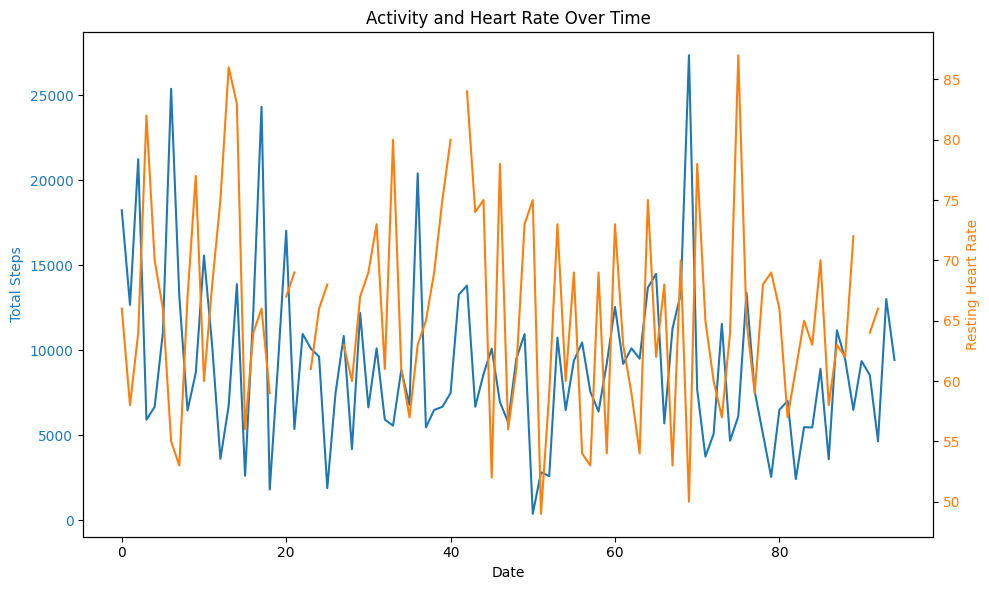

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# for steps
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Steps', color='tab:blue')
ax1.plot(data.index, data['TotalSteps_0'], label='Total Steps', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# for heart rate
ax2 = ax1.twinx()
ax2.set_ylabel('Resting Heart Rate', color='tab:orange') 
ax2.plot(data.index, data['RestingHeartRate_0'], label='Resting Heart Rate', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Activity and Heart Rate Over Time')

fig.tight_layout()
plt.show()

2. Distribution analysis

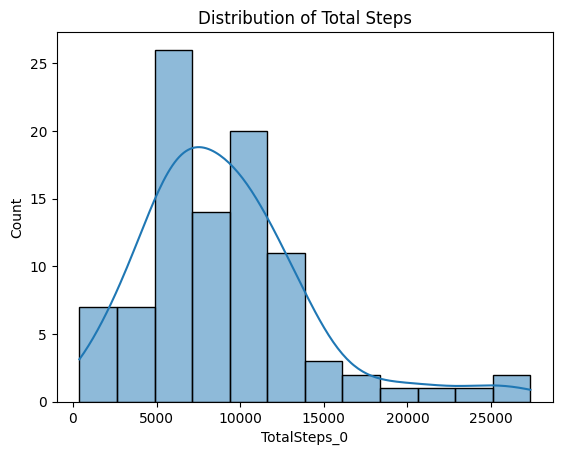

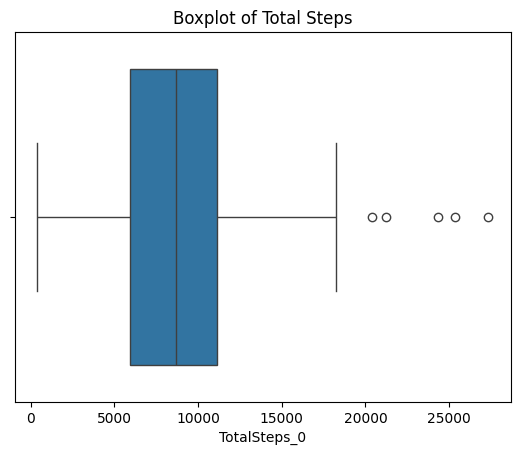

In [11]:
import seaborn as sns


sns.histplot(data['TotalSteps_0'], kde=True)
plt.title('Distribution of Total Steps')
plt.show()


sns.boxplot(x=data['TotalSteps_0'])
plt.title('Boxplot of Total Steps')
plt.show()
